# HealthPy
----

#### Note
* Keep an eye on your API usage. Use https://developers.google.com/maps/reporting/gmp-reporting as reference for how to monitor your usage and billing.


In [472]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import csv
import json
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import sem

# Import API key
from Health_api_keys import g_key
from pprint import pprint


### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [473]:
# Set up lists to store retrieved data from the first data set
d1_State=[]
d1_Month=[]
d1_Year=[]
d1_Number=[]
d1_Time_point=[]
month_names=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
month_no=["01","02","03","04","05","06","07","08","09","10","11","12"]

In [474]:
#  ["State", "Month","Year","Number"]
# Open the CSV
# Set path for file
csvpath = os.path.join(".","Data/Health","D1 State Suicide Figures 2017-2021.csv")
#print(csvpath)
with open(csvpath,"r",encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=",")
    csv_header = next(csvreader)
    print(f"CSV Header: {csv_header}")
    csvreader = csv.reader(csvfile, delimiter=",")
    cnt=0
    for row in csvreader:
        d1_State.append(row[0])
        d1_Month.append(row[1])
        d1_Year.append(row[2])
        d1_Number.append(row[3])
        d1_Time_point.append("")

for i in range(len(d1_Month)):
    for j in range(12):    
        # print(f"i= {i} j= {j}")
        if d1_Month[i]==month_names[j]:
            d1_Time_point[i]=(str(d1_Year[i])+str(month_no[j]))
  

CSV Header: ['State', 'Month', 'Year', 'Number']


In [475]:
# Create a timepoint series to use on the line chart
for i in range(len(d1_Month)):
    for j in range(12):    
        # print(f"i= {i} j= {j}")
        if d1_Month[i]==month_names[j]:
            d1_Time_point[i]=(str(d1_Year[i])+str(month_no[j]))


In [476]:
suicide_data =zip(d1_State,d1_Month,d1_Year,d1_Number,d1_Time_point)
suicide_data_df = pd.DataFrame(suicide_data, columns=("State", "Month","Year","Number", "Time_point"))  
suicide_data_df["Number"]=suicide_data_df["Number"].astype(int)
#suicide_data_df["Time_point"]=suicide_data_df["Time_point"].astype(int)
vic_suicide_data_df=suicide_data_df.loc[(suicide_data_df["State"]=="VIC") & (suicide_data_df["Time_point"] > "201606")]
print(vic_suicide_data_df.head())
nsw_suicide_data_df=suicide_data_df.loc[(suicide_data_df["State"]=="NSW") & (suicide_data_df["Time_point"] > "201606")]
print(nsw_suicide_data_df.head()) 

  State Month  Year  Number Time_point
0   VIC   Jan  2017      60     201701
1   VIC   Feb  2017      51     201702
2   VIC   Mar  2017      69     201703
3   VIC   Apr  2017      50     201704
4   VIC   May  2017      51     201705
   State Month  Year  Number Time_point
54   NSW   Jan  2017      88     201701
55   NSW   Feb  2017      82     201702
56   NSW   Mar  2017      96     201703
57   NSW   Apr  2017      74     201704
58   NSW   May  2017      78     201705


In [477]:
#for i in range(len(d1_Month)):
#    print(f"year: {d1_Year[i]} month: {d1_Month[i]}  timepoint: {d1_Time_point[i]}")

In [478]:
#x_timepoints=vic_suicide_data_df["Time_point"].sort_values()
#print(x_timepoints)
#y_datapoints=vic_suicide_data_df["Number"]
#print(y_datapoints)

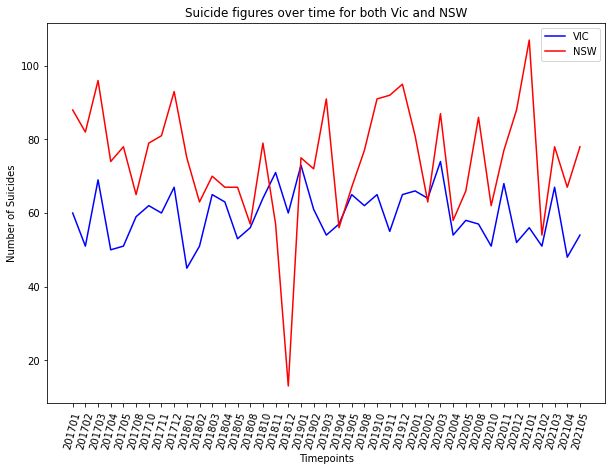

In [561]:
# Create a line grapth of the first data series to plot Suicide figures over time for both Vic and NSW

plt.figure(figsize=(10,7))
plt.title("Suicide figures over time for both Vic and NSW")

plt.xlabel("Timepoints")
plt.ylabel("Number of Suicides")

x1_timepoints=vic_suicide_data_df["Time_point"].sort_values()
y1_datapoints=vic_suicide_data_df["Number"]
plt.plot(x1_timepoints,y1_datapoints, color="blue", label="Number")

x2_timepoints=nsw_suicide_data_df["Time_point"].sort_values()
y2_datapoints=nsw_suicide_data_df["Number"]
plt.plot(x2_timepoints,y2_datapoints, color="red", label="Number")

plt.xticks(rotation=75)
plt.legend(['VIC','NSW',"Covid Infections"],loc=1)

plt.savefig("./Analysis/Health/1 Suicide_Figures_NSW_&_VIC.png")
plt.show()

In [520]:
#Independent T-Test
def gendata(population1, population2, pop1_label, pop2_label,title):
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label=pop1_label)
    plt.scatter(range(len(population2)), population2, label=pop2_label)
    plt.legend()
    plt.title(title)

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label=pop1_label)
    plt.hist(population2, 10, density=True, alpha=0.7, label=pop2_label)
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()
    plt.savefig(f"./Analysis/Health/{title}.png")

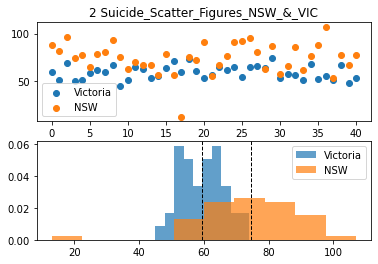

In [521]:
# Run T-Test for Suicide Data between states
population1=y1_datapoints
population2=y2_datapoints
pop1_label="Victoria"
pop2_label="NSW"
title="2 Suicide_Scatter_Figures_NSW_&_VIC"
gendata(population1, population2, pop1_label, pop2_label,title)
#plt.savefig("./Output_data/2 Suicide_Scatter_Figures_NSW_&_VIC.png")

In [522]:
stats.ttest_ind(population1, population2, equal_var=False)
## pvalue seems to indicate there is a correlation between Victoria and NSW's suicide figures

Ttest_indResult(statistic=-5.491988299916388, pvalue=1.0249555535629467e-06)

In [523]:
# Set up lists to store retrieved data from the second data set
d2_State=[]
d2_Time_period=[]
d2_Week_no=[]
d2_Year=[]
d2_Covid_infections=[]
d2_Deaths_2015_2019_avg=[]
d2_Deaths_2020_2021=[]
d2_Time_point=[]


In [524]:
# Read in and store data from the second data set
# Open the CSV
# Set path for file
csvpath = os.path.join(".","Data/Health","D2 Doctor certified deaths and COVID-19 infections Australia 1 Jun 2020 - 30 May 2021 vs 2015-2019 benchmarks.csv")
#print(csvpath)
with open(csvpath,"r",encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=",")
    csv_header = next(csvreader)
    print(f"CSV Header: {csv_header}")
    csvreader = csv.reader(csvfile, delimiter=",")
    cnt=0
    for row in csvreader:
        d2_State.append("VIC")
        d2_Time_period.append(row[0])
        d2_Week_no.append(row[1])
        d2_Year.append(row[2])
        d2_Covid_infections.append(row[4].replace(",",""))
        d2_Deaths_2015_2019_avg.append(row[5].replace(",",""))
        d2_Deaths_2020_2021.append(row[6].replace(",",""))
        d2_Time_point.append(row[7])
vic_deaths_data =zip(d2_State,d2_Time_period,d2_Week_no,d2_Year,d2_Covid_infections,d2_Deaths_2015_2019_avg,d2_Deaths_2020_2021,d2_Time_point)
vic_deaths_data_df = pd.DataFrame(vic_deaths_data, columns=("State", "Time_period","Week_no","Year","Covid_infections","Deaths_2015_2019_avg","Deaths_2020_2021","Time_point"))     
vic_deaths_data_df.head()
 

CSV Header: ['TimePeriod', 'WeekNo', 'Year', '2015-19 range', 'COVID-19 new infections', '2015-19 average deaths', '2020-21 deaths', 'Time_point']


,State,Time_period,Week_no,Year,Covid_infections,Deaths_2015_2019_avg,Deaths_2020_2021,Time_point
0,VIC,7-Jun-20,24,2020,62,2869,2748,202024
1,VIC,14-Jun-20,25,2020,64,2826,2745,202025
2,VIC,21-Jun-20,26,2020,137,2858,2687,202026
3,VIC,28-Jun-20,27,2020,231,2891,2680,202027
4,VIC,5-Jul-20,28,2020,575,2958,2768,202028


In [525]:
#print(x_timepoints)

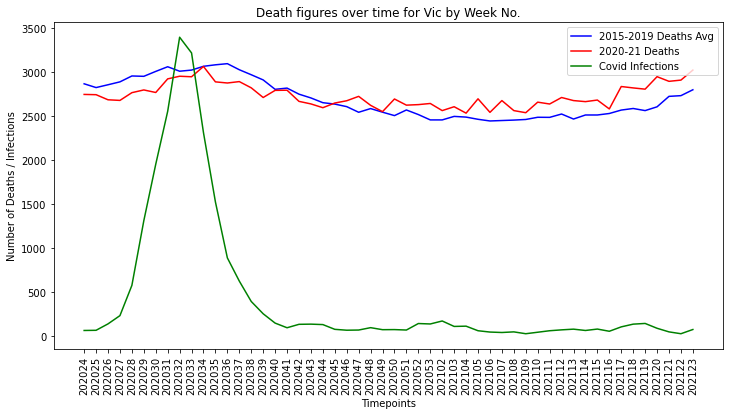

In [526]:
# Create a line grapth of the second data series to plot Death figures over time for Vic 
#deaths_data_2015_2019_df=vic_deaths_data_df.loc[(vic_deaths_data_df["Year"]=="2015-19 average deaths")]
x_timepoints=vic_deaths_data_df["Time_point"].sort_values()
y1_datapoints=vic_deaths_data_df["Deaths_2015_2019_avg"].astype(float)

plt.figure(figsize=(12,6))

plt.title("Death figures over time for Vic by Week No.")
plt.xlabel("Timepoints")
plt.ylabel("Number of Deaths / Infections")

plt.plot(x_timepoints,y1_datapoints, color="blue", label="Number");

y2_datapoints=vic_deaths_data_df["Deaths_2020_2021"].astype(float)
plt.plot(x_timepoints,y2_datapoints, color="red", label="Number");

y3_datapoints=vic_deaths_data_df["Covid_infections"].astype(float)
plt.plot(x_timepoints,y3_datapoints, color="green", label="Number")
plt.legend(['2015-2019 Deaths Avg','2020-21 Deaths','Covid Infections'],loc=1)
plt.xticks(rotation=90)
plt.savefig("./Analysis/Health/3 Deaths_Figures_2015-19vs2020-21.png")
plt.show()

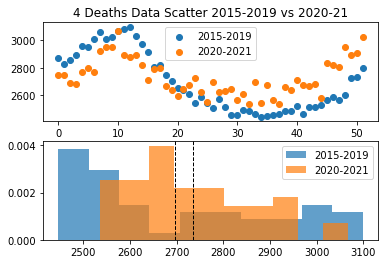

In [527]:
# Run T-Test for Deaths Data 2015-2019 vs 2020-21
population1=y1_datapoints
population2=y2_datapoints
pop1_label="2015-2019"
pop2_label="2020-2021"
title="4 Deaths Data Scatter 2015-2019 vs 2020-21"
gendata(population1, population2, pop1_label, pop2_label,title)
#plt.savefig("./Output_data/Deaths_Scatter_Figures_NSW_&_VIC.png")

In [528]:
stats.ttest_ind(population1, population2, equal_var=False)
## pvalue seems to indicate insufficient correlation between Victoria and NSW's suicide figures

Ttest_indResult(statistic=-1.1074389546828851, pvalue=0.27121986078581595)

In [529]:
# Set up lists to store retrieved data from the third data set
d3_Week_no=[]
d3_Year=[]
d3_Total=[]
d3_Males_total=[]
d3_Females_total=[]
d3_respiratory=[]
d3_influenza_pneumonia=[]
d3_pneumonia=[]
d3_chronic_lower_resp=[]
d3_cancer=[]
d3_ischaemic_heart=[]
d3_cerebrovas=[]
d3_dementia_Alzheim=[]
d3_diabetes=[]


In [530]:
# Deaths Statistics by Cause and year per 100,000
# Open the CSV
# Set path for file
csvpath = os.path.join(".","Data/Health","D3 Deaths Statistics by Cause and year.csv")
#print(csvpath)
with open(csvpath,"r",encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=",")
    csv_header = next(csvreader)
    #print(f"CSV Header: {csv_header}")
    csvreader = csv.reader(csvfile, delimiter=",")
    cnt=0
    for row in csvreader:
        # data for 2015_2019 Avg
        #print(f"Week: {row[0]}, {row[1]}, {row[2]}, {row[3]}")
        d3_Week_no.append(int(row[0]))
        d3_Year.append("2015-2019 Avg")                  
        d3_Total.append(row[3])
        d3_Males_total.append(row[6]) 
        d3_Females_total.append(row[9])
        d3_respiratory.append(row[12])
        d3_influenza_pneumonia.append(row[15])
        d3_pneumonia.append(row[18])
        d3_chronic_lower_resp.append(row[21])
        d3_cancer.append(row[24])
        d3_ischaemic_heart.append(row[27])
        d3_cerebrovas.append(row[30])
        d3_dementia_Alzheim.append(row[33])
        d3_diabetes.append(row[36])
        # data for 2020
        d3_Week_no.append(int(row[0]))
        d3_Year.append("2020")                  
        d3_Total.append(row[2])
        d3_Males_total.append(row[5]) 
        d3_Females_total.append(row[8])
        d3_respiratory.append(row[11])
        d3_influenza_pneumonia.append(row[14])
        d3_pneumonia.append(row[17])
        d3_chronic_lower_resp.append(row[20])
        d3_cancer.append(row[23])
        d3_ischaemic_heart.append(row[26])
        d3_cerebrovas.append(row[29])
        d3_dementia_Alzheim.append(row[32])
        d3_diabetes.append(row[35])
        # data for 2021
        if row[1]!="":
            d3_Week_no.append(int(row[0]))
            d3_Year.append("2021")                  
            d3_Total.append(row[1])
            d3_Males_total.append(row[4]) 
            d3_Females_total.append(row[7]) 
            d3_respiratory.append(row[10])
            d3_influenza_pneumonia.append(row[13])
            d3_pneumonia.append(row[16])
            d3_chronic_lower_resp.append(row[19])
            d3_cancer.append(row[22])
            d3_ischaemic_heart.append(row[25])
            d3_cerebrovas.append(row[28])
            d3_dementia_Alzheim.append(row[31])
            d3_diabetes.append(row[34])

vic_deaths_stats_data =zip(d3_Week_no,d3_Year,d3_Total, d3_Males_total,d3_Females_total, d3_respiratory,d3_influenza_pneumonia,d3_pneumonia,
                          d3_chronic_lower_resp,d3_cancer,d3_ischaemic_heart,d3_cerebrovas,d3_dementia_Alzheim,d3_diabetes)
vic_deaths_stats_df = pd.DataFrame(vic_deaths_stats_data, columns=("Week_no","Year","Total","Males_total","Females_total",
                                                                  "Respiratory","Influenza_pneumonia","Pneumonia",
                                                                  "Chronic_lower_resp","Cancer","Ischaemic_heart",
                                                                  "Cerebrovas","Dementia_Alzheim","Diabetes"))    
vic_deaths_stats_df.head()


,Week_no,Year,Total,Males_total,Females_total,Respiratory,Influenza_pneumonia,Pneumonia,Chronic_lower_resp,Cancer,Ischaemic_heart,Cerebrovas,Dementia_Alzheim,Diabetes
0,1,2015-2019 Avg,8.173,9.328,7.178,0.755,0.148,0.137,0.442,2.973,0.85,0.573,0.708,0.231
1,1,2020,7.463,8.558,6.498,0.703,0.128,0.119,0.372,2.632,0.629,0.41,0.711,0.251
2,1,2021,7.532,8.842,6.405,0.623,0.072,0.072,0.401,2.782,0.661,0.485,0.687,0.245
3,2,2015-2019 Avg,8.142,9.228,7.209,0.712,0.134,0.128,0.411,2.978,0.809,0.565,0.688,0.242
4,2,2020,7.547,8.75,6.528,0.707,0.111,0.111,0.434,2.796,0.648,0.483,0.748,0.213


In [531]:
vic_deaths_stats_df.head()

,Week_no,Year,Total,Males_total,Females_total,Respiratory,Influenza_pneumonia,Pneumonia,Chronic_lower_resp,Cancer,Ischaemic_heart,Cerebrovas,Dementia_Alzheim,Diabetes
0,1,2015-2019 Avg,8.173,9.328,7.178,0.755,0.148,0.137,0.442,2.973,0.85,0.573,0.708,0.231
1,1,2020,7.463,8.558,6.498,0.703,0.128,0.119,0.372,2.632,0.629,0.41,0.711,0.251
2,1,2021,7.532,8.842,6.405,0.623,0.072,0.072,0.401,2.782,0.661,0.485,0.687,0.245
3,2,2015-2019 Avg,8.142,9.228,7.209,0.712,0.134,0.128,0.411,2.978,0.809,0.565,0.688,0.242
4,2,2020,7.547,8.75,6.528,0.707,0.111,0.111,0.434,2.796,0.648,0.483,0.748,0.213


In [532]:
#d3_Week_no,d3_Year,d3_Total, d3_Males_total,d3_Females_total
#for i in range(len(d3_Week_no)):
#    print(f"{d3_Week_no[i]}, {d3_Year[i]},{d3_Total[i]}")

In [533]:
# Fix any blank values
#for i in range(len(vic_deaths_stats_df)):
#    if vic_deaths_stats_df["Total"][i]=="":
#        vic_deaths_stats_df["Total"][i]=0

In [534]:
# Fix any blank values
#for i in range(len(vic_deaths_stats_df)):
#    if vic_deaths_stats_df["Total"][i]==0:
#        print(vic_deaths_stats_df["Total"][i])

In [535]:
#

Data_2015_2019_Avg_df =vic_deaths_stats_df.loc[(vic_deaths_stats_df["Year"]=="2015-2019 Avg")]
Data_2020_df=vic_deaths_stats_df.loc[(vic_deaths_stats_df["Year"]=="2020")]
Data_2021_df=vic_deaths_stats_df.loc[(vic_deaths_stats_df["Year"]=="2021")]

In [536]:
#Data_2015_2019_Avg_df.value_counts()

In [537]:
#def make_quesadilla(protein, topping="sour cream"):
#    quesadilla = f"Here is a {protein} quesadilla with {topping}"
#    print(quesadilla)

# Make a quesadilla using the default topping
#make_quesadilla("chicken")

# Make a quesadilla with a new topping
#make_quesadilla("beef", "guacamole")

def print_graph(column1,title):
    #  Plot total deaths in 2021 vs 2020 and 2015-2019 Avg
    x_timepoints1=Data_2015_2019_Avg_df["Week_no"].sort_values()
    x_timepoints2=Data_2020_df["Week_no"].sort_values()
    x_timepoints3=Data_2021_df["Week_no"].sort_values()

    y_datapoints1=Data_2015_2019_Avg_df[column1].astype(float)
    y_datapoints2=Data_2020_df[column1].astype(float)
    y_datapoints3=Data_2021_df[column1].astype(float)

    plt.figure(figsize=(12,7))

    plt.title(f"{title}")
    plt.xlabel("Timepoints")
    plt.ylabel("Number of Deaths per 100K")

    plt.plot(x_timepoints1,y_datapoints1, color="blue", label="Number")
    plt.plot(x_timepoints2,y_datapoints2, color="red", label="Number")
    plt.plot(x_timepoints3,y_datapoints3, color="green", label="Number")

    plt.legend(["2015-2019 Avg",'2020','2021'],loc=1)
    plt.xticks(rotation=90)
    plt.savefig(f"./Analysis/Health/{title}.png")
    plt.show()


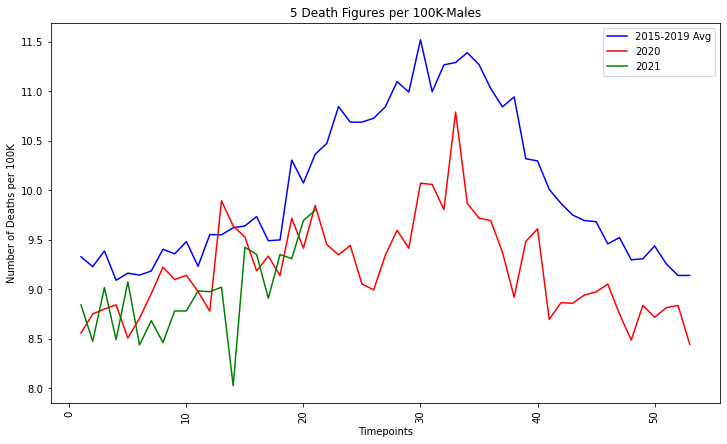

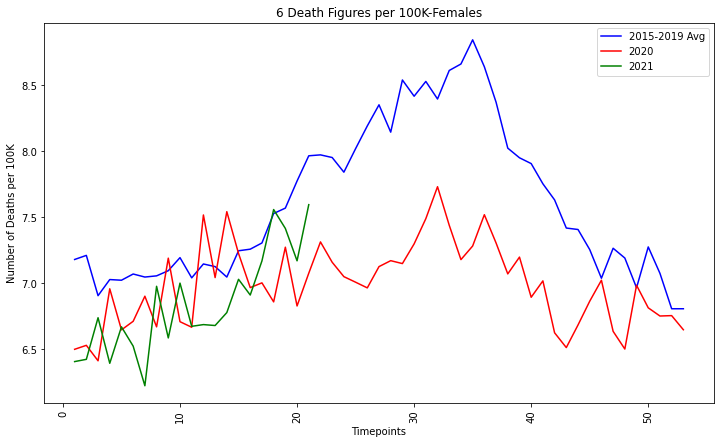

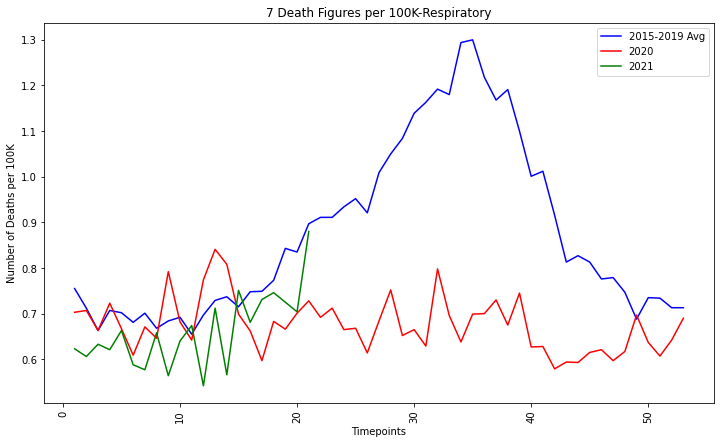

In [538]:
print_graph("Males_total","5 Death Figures per 100K-Males")
print_graph("Females_total","6 Death Figures per 100K-Females")
print_graph("Respiratory","7 Death Figures per 100K-Respiratory")

#"Week_no","Year","Total","Males_total","Females_total",
#  "Respiratory","Influenza_pneumonia","Pneumonia",
#  "Chronic_lower_resp","Cancer","Ischaemic_heart",
#  "Ischaemic_heart","Dementia_Alzheim","Diabetes"

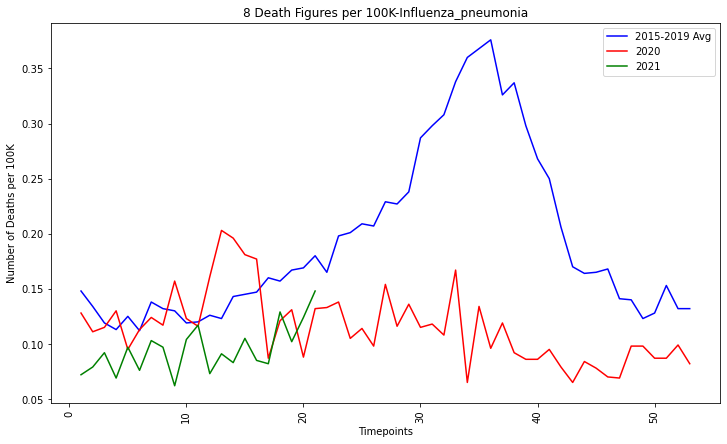

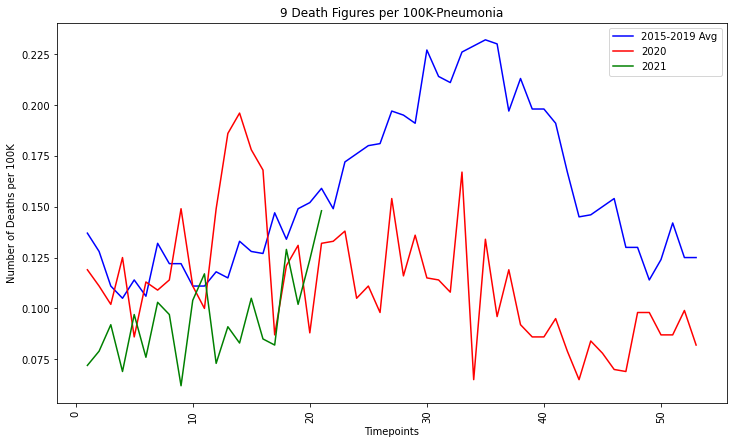

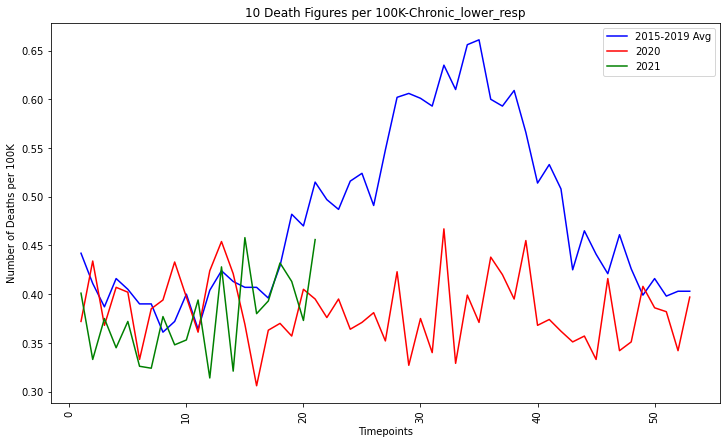

In [539]:
print_graph("Influenza_pneumonia","8 Death Figures per 100K-Influenza_pneumonia")
print_graph("Pneumonia","9 Death Figures per 100K-Pneumonia")
print_graph("Chronic_lower_resp","10 Death Figures per 100K-Chronic_lower_resp")

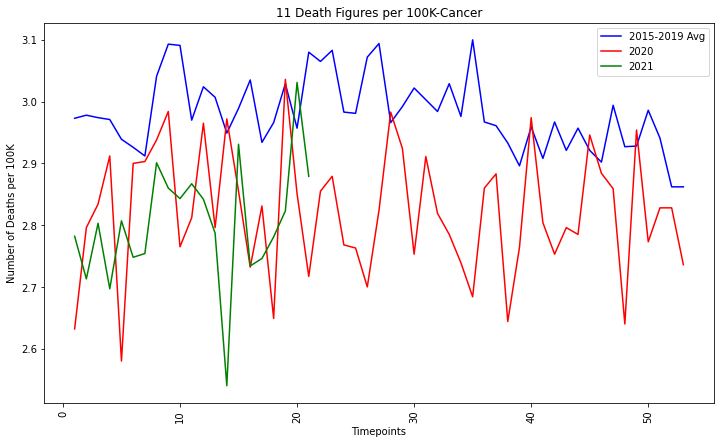

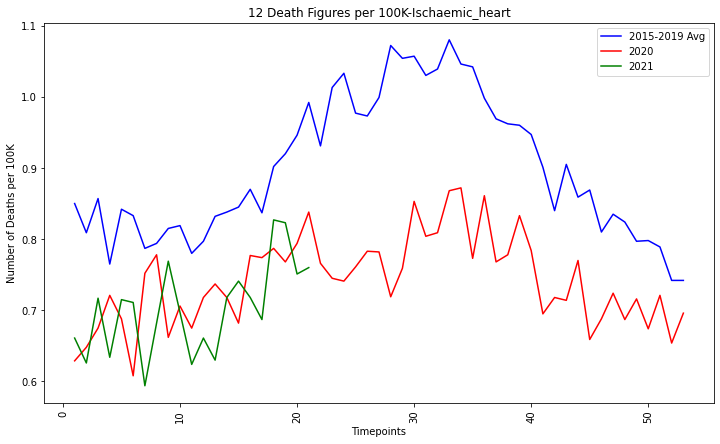

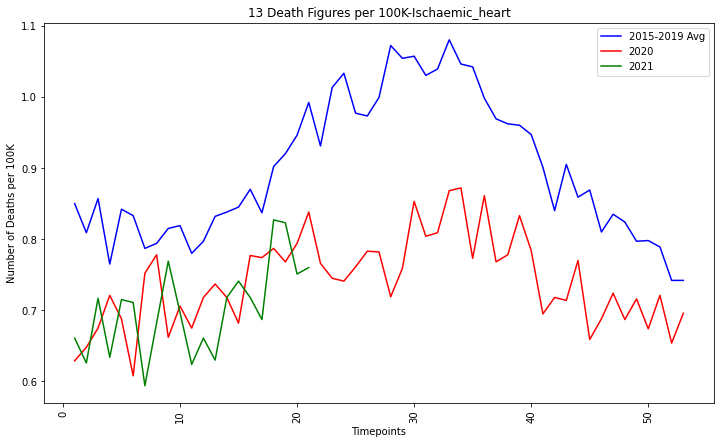

In [540]:
print_graph("Cancer","11 Death Figures per 100K-Cancer")
print_graph("Ischaemic_heart","12 Death Figures per 100K-Ischaemic_heart")
print_graph("Ischaemic_heart","13 Death Figures per 100K-Ischaemic_heart")

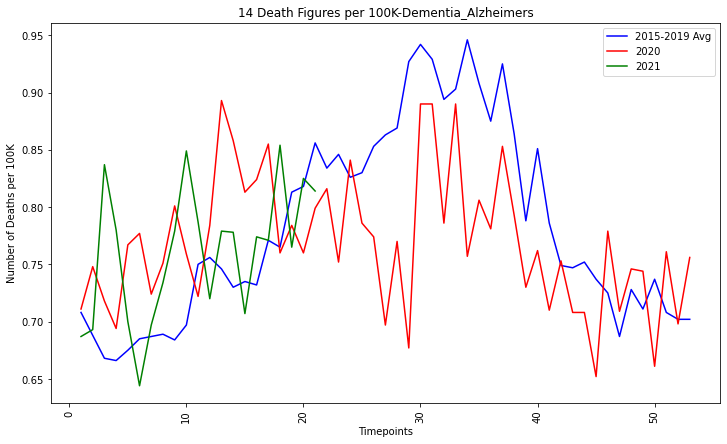

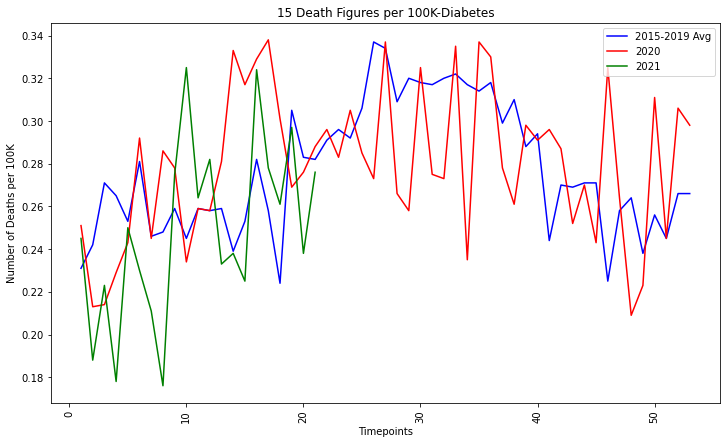

In [541]:

print_graph("Dementia_Alzheim","14 Death Figures per 100K-Dementia_Alzheimers")
print_graph("Diabetes","15 Death Figures per 100K-Diabetes")

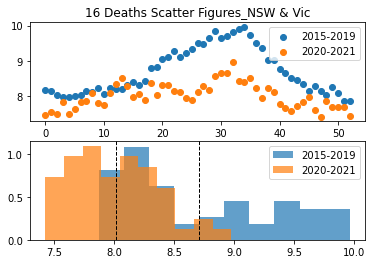

In [542]:
# Run T-Test for Deaths Data per Hundred 2015-2019 vs 2020-21
y_datapoints1=Data_2015_2019_Avg_df["Total"].astype(float)
y_datapoints2=Data_2020_df["Total"].astype(float)

population1=y_datapoints1
population2=y_datapoints2
pop1_label="2015-2019"
pop2_label="2020-2021"
title="16 Deaths Scatter Figures_NSW & Vic"
gendata(population1, population2, pop1_label, pop2_label,title)


In [543]:
stats.ttest_ind(population1, population2, equal_var=False)
# pvalue test indicates no correlation

Ttest_indResult(statistic=6.782389558877744, pvalue=1.7927697947333598e-09)

In [544]:
vic_deaths_stats_df.loc[(vic_deaths_stats_df["Year"]=="2021")  & (vic_deaths_stats_df["Week_no"] > 19)].head()

,Week_no,Year,Total,Males_total,Females_total,Respiratory,Influenza_pneumonia,Pneumonia,Chronic_lower_resp,Cancer,Ischaemic_heart,Cerebrovas,Dementia_Alzheim,Diabetes
59,20,2021,8.32,9.694,7.168,0.704,0.124,0.124,0.373,3.031,0.751,0.459,0.825,0.238
62,21,2021,8.619,9.797,7.593,0.88,0.148,0.148,0.456,2.879,0.76,0.543,0.814,0.276


In [545]:
# Set up lists to store retrieved data from the fourth data set
d4_State=[]
d4_Service=[]
d4_Year=[]
d4_Total=[]



In [546]:
#  Crisis Support Contacts 2019-2021
# Open the CSV
# Set path for file
csvpath = os.path.join(".","Data/Health","D5 Crisis Support Contacts 2019-2021.csv")
#print(csvpath)
with open(csvpath,"r",encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=",")
    csv_header = next(csvreader)
    print(f"CSV Header: {csv_header}")
    csvreader = csv.reader(csvfile, delimiter=",")
    cnt=0
    for row in csvreader:
        d4_Year.append("2019")
        d4_State.append(row[0])
        d4_Service.append(row[1])
        d4_Total.append(row[2])
        d4_Year.append("2020")
        d4_State.append(row[0])
        d4_Service.append(row[1])
        d4_Total.append(row[3])
        d4_Year.append("2021")
        d4_State.append(row[0])
        d4_Service.append(row[1])
        d4_Total.append(row[4])
Crisis_stats_data =zip(d4_State, d4_Service, d4_Year, d4_Total)
Crisis_stats_df = pd.DataFrame(Crisis_stats_data, columns=("State","Service","Year","Total"))     
Crisis_stats_df 

CSV Header: ['State', 'Service', '2019', '2020', '2021']


,State,Service,Year,Total
0,Vic,Lifeline,2019,29089
1,Vic,Lifeline,2020,19747
2,Vic,Lifeline,2021,21233
3,Vic,Kids Helpline,2019,4295
4,Vic,Kids Helpline,2020,3720
5,Vic,Kids Helpline,2021,3382
6,Vic,Beyond Blue,2019,6795
7,Vic,Beyond Blue,2020,3665
8,Vic,Beyond Blue,2021,4118
9,NSW,Lifeline,2019,30730


In [547]:
KidsLine_stats_Vic_df

,State,Service,Year,Total
3,Vic,Kids Helpline,2019,4295
4,Vic,Kids Helpline,2020,3720
5,Vic,Kids Helpline,2021,3382


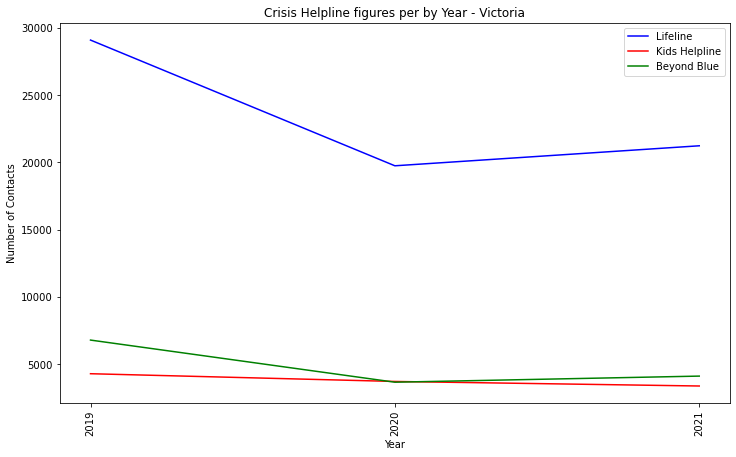

In [560]:
#Crisis_stats_df = pd.DataFrame(Crisis_stats_data, columns=("State","Service","Year","Total"))         
Lifeline_stats_Vic_df = Crisis_stats_df.loc[(Crisis_stats_df["Service"]=="Lifeline") & (Crisis_stats_df["State"]=="Vic")]
KidsLine_stats_Vic_df = Crisis_stats_df.loc[(Crisis_stats_df["Service"]=="Kids Helpline") & (Crisis_stats_df["State"]=="Vic")]
Beyond_blue_stats_Vic_df = Crisis_stats_df.loc[(Crisis_stats_df["Service"]=="Beyond Blue") & (Crisis_stats_df["State"]=="Vic")]
    
plt.figure(figsize=(12,7))

plt.title(f"Crisis Helpline figures per by Year - Victoria")
plt.xlabel("Year")
plt.ylabel("Number of Contacts")

x_timepoints1=Lifeline_stats_Vic_df["Year"].sort_values()
x_timepoints2=KidsLine_stats_Vic_df["Year"].sort_values()
x_timepoints3=Beyond_blue_stats_Vic_df["Year"].sort_values()

y_datapoints1=Lifeline_stats_Vic_df["Total"].astype(float)
y_datapoints2=KidsLine_stats_Vic_df["Total"].astype(float)
y_datapoints3=Beyond_blue_stats_Vic_df["Total"].astype(float)
    
plt.plot(x_timepoints1,y_datapoints1, color="blue", label="Number")
plt.plot(x_timepoints2,y_datapoints2, color="red", label="Number")
plt.plot(x_timepoints3,y_datapoints3, color="green", label="Number")

plt.legend(["Lifeline",'Kids Helpline','Beyond Blue'],loc=1)
plt.xticks(rotation=90)
plt.savefig(f"./Analysis/Health/17 Crisis Helpline Figures-VIC.png")
plt.show()    


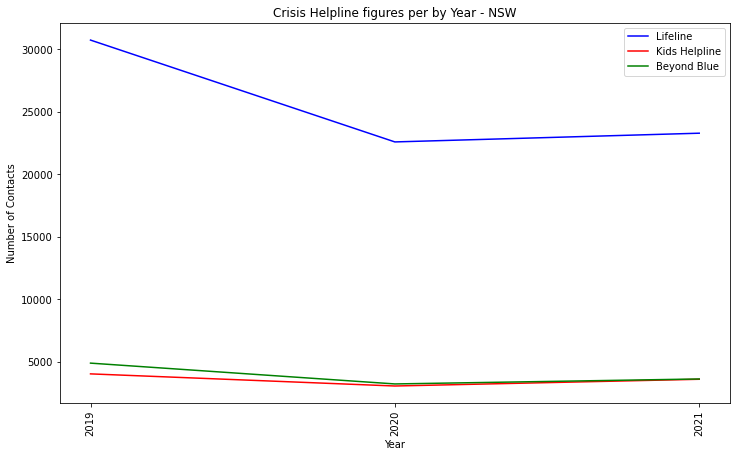

In [549]:
#Crisis_stats_df = pd.DataFrame(Crisis_stats_data, columns=("State","Service","Year","Total"))         
Lifeline_stats_NSW_df = Crisis_stats_df.loc[(Crisis_stats_df["Service"]=="Lifeline") & (Crisis_stats_df["State"]=="NSW")]
KidsLine_stats_NSW_df = Crisis_stats_df.loc[(Crisis_stats_df["Service"]=="Kids Helpline") & (Crisis_stats_df["State"]=="NSW")]
Beyond_blue_stats_NSW_df = Crisis_stats_df.loc[(Crisis_stats_df["Service"]=="Beyond Blue") & (Crisis_stats_df["State"]=="NSW")]
    
plt.figure(figsize=(12,7))

plt.title(f"Crisis Helpline figures per by Year - NSW")
plt.xlabel("Year")
plt.ylabel("Number of Contacts")

x_timepoints1=Lifeline_stats_NSW_df["Year"].sort_values()
x_timepoints2=KidsLine_stats_NSW_df["Year"].sort_values()
x_timepoints3=Beyond_blue_stats_NSW_df["Year"].sort_values()

y_datapoints1=Lifeline_stats_NSW_df["Total"].astype(float)
y_datapoints2=KidsLine_stats_NSW_df["Total"].astype(float)
y_datapoints3=Beyond_blue_stats_NSW_df["Total"].astype(float)
    
plt.plot(x_timepoints1,y_datapoints1, color="blue", label="Number")
plt.plot(x_timepoints2,y_datapoints2, color="red", label="Number")
plt.plot(x_timepoints3,y_datapoints3, color="green", label="Number")

plt.legend(["Lifeline",'Kids Helpline','Beyond Blue'],loc=1)
plt.xticks(rotation=90)
plt.savefig(f"./Analysis/Health/18 Crisis Helpline Figures-NSW.png")
plt.show()  

In [550]:

# ['City_ID', 'City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed']
#ideal_weather_cities_df = cities_data_df.loc[(cities_data_df['Max Temp'].astype(float) > 70) 
#                                         & (cities_data_df['Max Temp'].astype(float) < 80)
#                                         & (cities_data_df['Wind Speed'].astype(float) < 10)
#                                         & (cities_data_df['Cloudiness'].astype(float) == 0)]
# remove any rows with null values
#ideal_weather_cities_df = ideal_weather_cities_df.dropna(how="any")
#ideal_weather_cities_df



In [551]:
# Set up lists to store retrieved data from the fifth data set
d5_Gender_period=[]
d5_Gender_measure_type=[]
d5_Gender=[]
d5_Gender_percent=[]

d5_Age_group_period=[]
d5_Age_group_measure_type=[]
d5_Age_group=[]
d5_Age_group_percent=[]

d5_State_period=[]
d5_State_measure_type=[]
d5_State=[]
d5_State_percent=[]
Period_labels=["1. Nov 2020","2. Mar 2021", "3. Jun 2021"]
#for i in range(3):
#    print(Period_labels[i])

In [552]:
#  Period are Nov 2020,  Mar 2021, and June 2021
# Open the CSV
# Set path for file
csvpath = os.path.join(".","Data/Health","D4 Health Impact Surveys using K10.csv")
#print(csvpath)
with open(csvpath,"r",encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=",")
    csv_header = next(csvreader)
    print(f"CSV Header: {csv_header}")
    csvreader = csv.reader(csvfile, delimiter=",")
    for row in csvreader:
        offset=0
        for i in range(3):
            d5_Gender_period.append(Period_labels[i])
            d5_Gender_measure_type.append(row[0])
            d5_Gender.append("Male")
            d5_Gender_percent.append(row[1+offset])
            d5_Gender_period.append(Period_labels[i])
            d5_Gender_measure_type.append(row[0])
            d5_Gender.append("Female")
            d5_Gender_percent.append(row[2+offset])        
            d5_Gender_period.append(Period_labels[i])
            d5_Gender_measure_type.append(row[0])
            d5_Gender.append("All")
            d5_Gender_percent.append(row[12+offset])

            d5_Age_group_period.append(Period_labels[i])
            d5_Age_group_measure_type.append(row[0])
            d5_Age_group.append("18 to 34")
            d5_Age_group_percent.append(row[3+offset])
            d5_Age_group_period.append(Period_labels[i])
            d5_Age_group_measure_type.append(row[0])
            d5_Age_group.append("35 to 64")
            d5_Age_group_percent.append(row[4+offset])        
            d5_Age_group_period.append(Period_labels[i])
            d5_Age_group_measure_type.append(row[0])
            d5_Age_group.append("65 plus")
            d5_Age_group_percent.append(row[5+offset])

            d5_State_period.append(Period_labels[i])
            d5_State_measure_type.append(row[0])
            d5_State.append("NSW")
            d5_State_percent.append(row[6+offset])
            d5_State_period.append(Period_labels[i])
            d5_State_measure_type.append(row[0])
            d5_State.append("VIC")
            d5_State_percent.append(row[7+offset])        
            d5_State_period.append(Period_labels[i])
            d5_State_measure_type.append(row[0])
            d5_State.append("QLD")
            d5_State_percent.append(row[8+offset])
            d5_State_period.append(Period_labels[i])
            d5_State_measure_type.append(row[0])
            d5_State.append("SA")
            d5_State_percent.append(row[9+offset])
            d5_State_period.append(Period_labels[i])
            d5_State_measure_type.append(row[0])
            d5_State.append("WA")
            d5_State_percent.append(row[10+offset])        
            d5_State_period.append(Period_labels[i])
            d5_State_measure_type.append(row[0])
            d5_State.append("Rest")
            d5_State_percent.append(row[11+offset])
            
            offset +=12


CSV Header: ['Type_of_Measure', '1. Male', '1. Female', '1. 18 to 34', '1. 35 to 64', '1. 65 and over', '1. NSW', '1. Vic.', '1. Qld', '1. SA', '1. WA', '1. Rest of Australia (NT  Tas  ACT only)', '1. All persons', '2. Male', '2. Female', '2. 18 to 34', '2. 35 to 64', '2. 65 and over', '2. NSW', '2. Vic.', '2. Qld', '2. SA', '2. WA', '2. Rest of Australia (NT  Tas  ACT only)', '2. All persons', '3. Male', '3. Female', '3. 18 to 34', '3. 35 to 64', '3. 65 and over', '3. NSW', '3. Vic.', '3. Qld', '3. SA', '3. WA', '3. Rest of Australia (NT  Tas  ACT only)', '3. All persons']


In [553]:
# Psychological Stress levels under Measure Type
#Low distress level
#Moderate distress level
#High distress level
#Very high distress level
#High / Very high distress level
#Discussed feelings of psychological distress with a doctor or other health professional
#Did not discuss feelings of psychological distress with a doctor or other health professional



In [554]:
gender_impact = zip(d5_Gender_period, d5_Gender_measure_type, d5_Gender,d5_Gender_percent)
gender_impact_df = pd.DataFrame(gender_impact, columns = ("Gender_period", "Gender_measure_type", "Gender","Gender_percent"))
gender_impact_df["Gender_percent"]=gender_impact_df["Gender_percent"].astype(float)

aged_group_impact = zip(d5_Age_group_period,d5_Age_group_measure_type,d5_Age_group,d5_Age_group_percent)
aged_group_impact_df = pd.DataFrame(aged_group_impact, columns = ("Age_group_period", "Age_group_measure_type", "Age_group","Age_group_percent"))
aged_group_impact_df["Age_group_percent"]=aged_group_impact_df["Age_group_percent"].astype(float)

State_impact = zip(d5_State_period,d5_State_measure_type,d5_State,d5_State_percent)
State_impact_df = pd.DataFrame(State_impact, columns = ("State_period", "State_measure_type", "State","State_percent"))
State_impact_df["State_percent"]=State_impact_df["State_percent"].astype(float)

In [555]:
#print(gender_impact_df)
#print(aged_group_impact_df)
print(State_impact_df)

    State_period                                 State_measure_type State  \
0    1. Nov 2020                                 Low distress level   NSW   
1    1. Nov 2020                                 Low distress level   VIC   
2    1. Nov 2020                                 Low distress level   QLD   
3    1. Nov 2020                                 Low distress level    SA   
4    1. Nov 2020                                 Low distress level    WA   
..           ...                                                ...   ...   
121  3. Jun 2021  Did not discuss feelings of psychological dist...   VIC   
122  3. Jun 2021  Did not discuss feelings of psychological dist...   QLD   
123  3. Jun 2021  Did not discuss feelings of psychological dist...    SA   
124  3. Jun 2021  Did not discuss feelings of psychological dist...    WA   
125  3. Jun 2021  Did not discuss feelings of psychological dist...  Rest   

     State_percent  
0             56.7  
1             51.8  
2           

In [556]:
#"State_period", "State_measure_type", "State","State_percent")         
def print_impact_graph(state_code,state_desc):
    #print(f"{state_code} {state_desc}")
    State_impact_stats_df1 = State_impact_df.loc[(State_impact_df["State"]==state_code) & 
                                                    (State_impact_df["State_measure_type"]=="Low distress level")]
    State_impact_stats_df2 = State_impact_df.loc[(State_impact_df["State"]==state_code) & 
                                                    (State_impact_df["State_measure_type"]=="Moderate distress level")]
    State_impact_stats_df3 = State_impact_df.loc[(State_impact_df["State"]==state_code) & 
                                                    (State_impact_df["State_measure_type"]=="High distress level")]
    State_impact_stats_df4 = State_impact_df.loc[(State_impact_df["State"]==state_code) & 
                                                    (State_impact_df["State_measure_type"]=="Very high distress level")]
    
    plt.figure(figsize=(8,5))

    plt.title(f"State Impact - Level of Distress figures per period - {state_code}")
    plt.xlabel("Period")
    plt.ylabel("Percentage")

    x_timepoints1=State_impact_stats_df1["State_period"].sort_values()
    x_timepoints2=State_impact_stats_df2["State_period"].sort_values()
    x_timepoints3=State_impact_stats_df3["State_period"].sort_values()
    x_timepoints4=State_impact_stats_df4["State_period"].sort_values()

    y_datapoints1=State_impact_stats_df1["State_percent"].astype(float)
    y_datapoints2=State_impact_stats_df2["State_percent"].astype(float)
    y_datapoints3=State_impact_stats_df3["State_percent"].astype(float)
    y_datapoints4=State_impact_stats_df4["State_percent"].astype(float)

    #y_datapoints2=KidsLine_stats_Vic_df["Total"].astype(float)
    #y_datapoints3=Beyond_blue_stats_Vic_df["Total"].astype(float)

    plt.plot(x_timepoints1,y_datapoints1, color="green", label="Percentage")
    plt.plot(x_timepoints2,y_datapoints2, color="blue", label="Percentage")
    plt.plot(x_timepoints3,y_datapoints3, color="red", label="Percentage")
    plt.plot(x_timepoints4,y_datapoints4, color="black", label="Percentage")

    #plt.plot(x_timepoints2,y_datapoints2, color="red", label="Number")
    #plt.plot(x_timepoints3,y_datapoints3, color="green", label="Number")

    plt.legend(["Low","Moderate","High","Very High" ],loc=1)
    plt.xticks(rotation=90)
    plt.savefig(f"./Analysis/Health/{state_desc} -Crisis Helpline Figures.png")
    plt.show()    


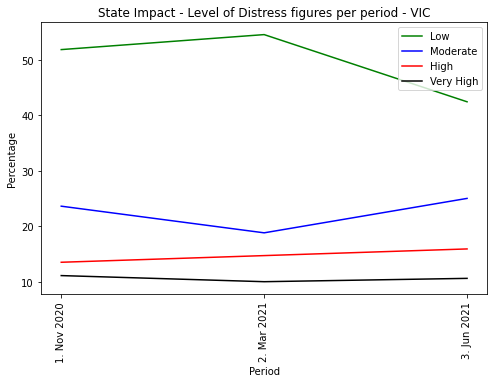

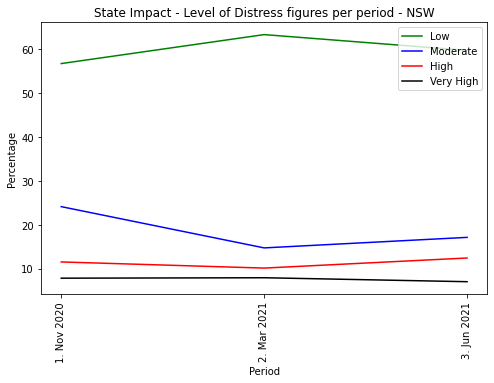

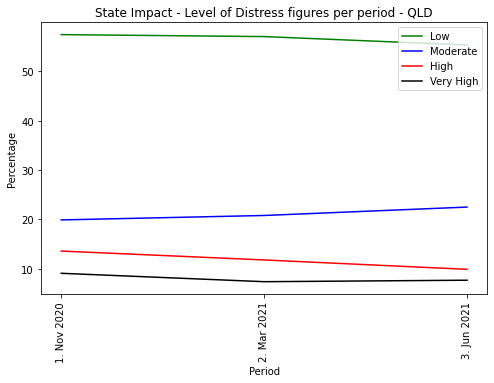

In [557]:
print_impact_graph("VIC","19 Victoria")
print_impact_graph("NSW","20 NSW")
print_impact_graph("QLD","21 Queensland")
